在代码运行前先引入下面的设置内容。

In [2]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline



# 关联 （Correlation）

关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。


### 散点图（Scatter plot）

散点图是用于研究两个变量之间关系的经典的和基本的图表。 如果数据中有多个组，则可能需要以不同颜色可视化每个组。 在 matplotlib 中，您可以使用 `plt.scatterplot（）` 方便地执行此操作。

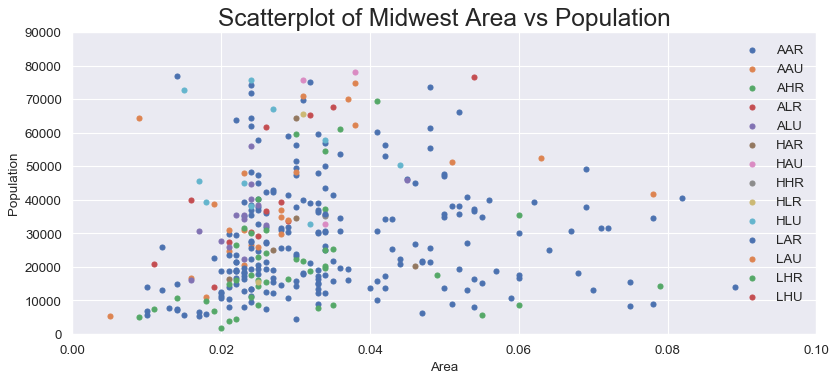

In [21]:
#导入数据 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# 画表
plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, cmap=colors[i], label=str(category))
    

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

联合分布图 （Jointplot）采用两个变量并一起创建直方图和散点图。 让我们看一下 jointplot 的语法。

$$sns.jointplot(x = , y =, data=)$$

从 tips数据集创建 total_bill 和 tip变量的联合分布图。 通常，任何餐厅的小费金额取决于总账单/账单大小。 代码如下：

**Jointplot基本参数  
seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True,xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)**
  
>kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }

基本：
><strong>color</strong> : 颜色。参数类型： matplotlib color  
<strong>size</strong> : 默认 6，图的尺度大小（正方形）。参数类型：numeric  
<strong>ratio</strong> : 中心图与侧边图的比例，越大、中心图占比越大。参数类型：numeric  
<strong>space</strong> : 中心图与侧边图的间隔大小。参数类型：numeric  
<strong>s</strong> : 点的大小。参数类型：numeric  
<strong>linewidth</strong> : 线的宽度。参数类型：numeric  
<strong>edgecolor</strong> : 点的边界颜色，默认无色，可以重叠。"w"为白色。参数类型：matplotlib color  
<strong>{x, y}lim</strong> : x、y轴的范围。参数类型：two-tuples  
<strong>{joint, marginal, annot}_kws</strong> : dicts Additional keyword arguments for the plot components.  
marginal_kws : 侧边图的信息。例如：dict(bins=15, rug=True)  
annot_kws : 注释的信息。例如：dict(stat="r")  

颜色
>绿色：#6AB27B  
土色：#a27712  
浅紫色：#8172B2  
蓝色：#4C72B0  
红色：#C44E52  



In [6]:
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # Matplotlibrary
import seaborn as sns # Seaborn Library
%matplotlib inline
sns.set()

# Load the Dataset in Python
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


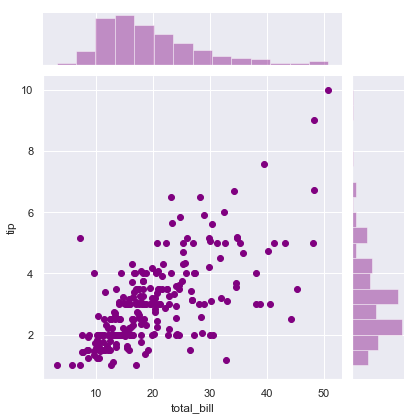

In [7]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, color="purple")

### Jointplot :: kind =”hex”

直方图的双变量类比称为“hexbin”图，因为它显示了六边形区间内的观察计数。 此图对于相对较大的数据集最有效。 也称为Hexbin Plots。

$$sns.jointplot(x = , y =, data=, kind=”hex”)$$

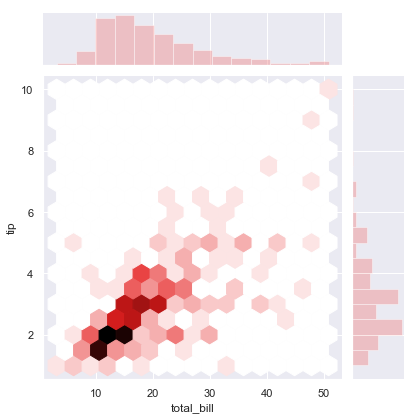

In [15]:
# Jointplot - Scatterplot and Histogram
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind ="hex",
color="lightcoral")

kind 参数值可以是以下取值：

>kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }


下面，我们来看看 kind="kde" 的情形。

### Jointplot :: kind =”kde”



<Figure size 1152x576 with 0 Axes>

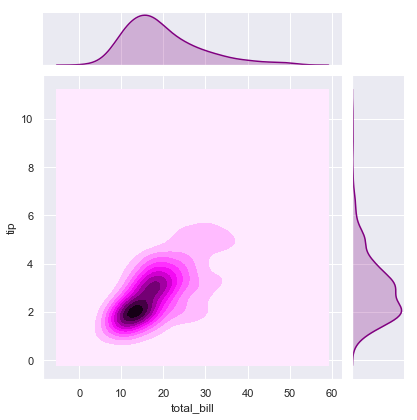

In [12]:
# Jointplot - Scatterplot and Histogram
plt.figure(figsize=(16, 8))
sns.jointplot(x = tips["total_bill"], y = tips["tip"],kind = "kde", 
color="purple") # contour plot

上面显示的图表称为轮廓图。 轮廓图（有时称为“水平图”）是一种在二维平面上显示三维表面的方法。 它绘制了y轴上的两个预测变量X Y和轮廓的响应变量Z.

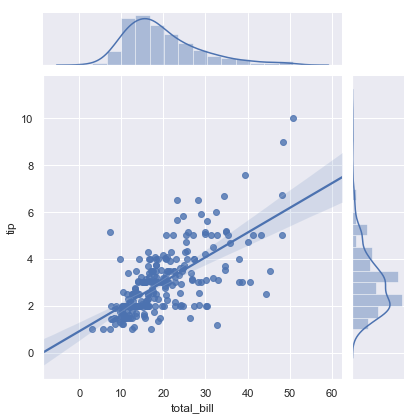

In [16]:
g3 = sns.jointplot("total_bill", "tip", data=tips, kind="reg")

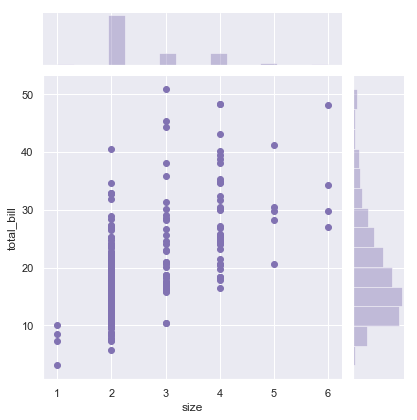

In [17]:
g6 = sns.jointplot("size", "total_bill", data=tips, color="#8172B2")

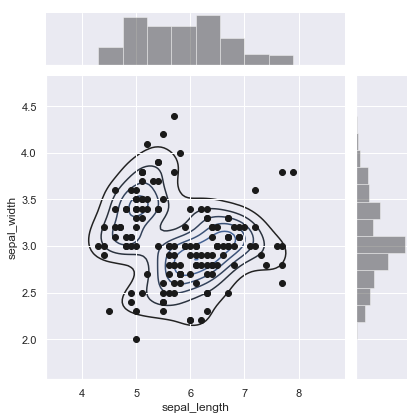

In [19]:
iris = sns.load_dataset("iris")
(sns.jointplot("sepal_length", "sepal_width", data=iris, color="k")
      .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

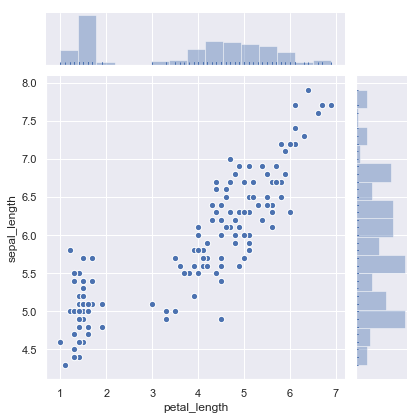

In [20]:
sns.jointplot("petal_length", "sepal_length", data=iris, marginal_kws=dict(bins=15, rug=True), 
                    annot_kws=dict(stat="r"), s=40, edgecolor="w", linewidth=1)

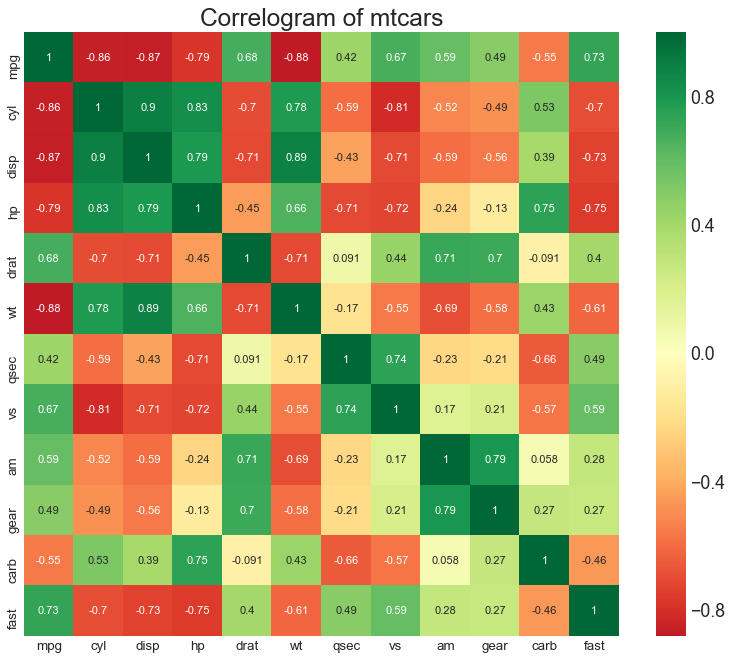

In [3]:
#相关性分析图
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 矩阵图 （Pairplot）

矩阵图基本上绘制了变量之间的成对关系。 它支持用 “hue” 来为类别变量绘图着色。

$$sns.pairplot(“dataframe”)$$

   **seaborn.pairplot（data，hue = None，hue_order = None，palette = None，vars = None，x_vars = None，y_vars = None，kind ='scatter'，diag_kind ='auto'，markers = None，height = 2.5，aspect = 1，dropna = True，plot_kws = None，diag_kws = None，grid_kws = None，size = None ）**

>kind：{'scatter'，'reg'}，可选
一种非身份关系的情节。  
diag_kind：{'auto'，'hist'，'kde'}，可选
对角线子图的一种情节。默认值取决于是否 "hue"使用。

<Figure size 800x640 with 0 Axes>

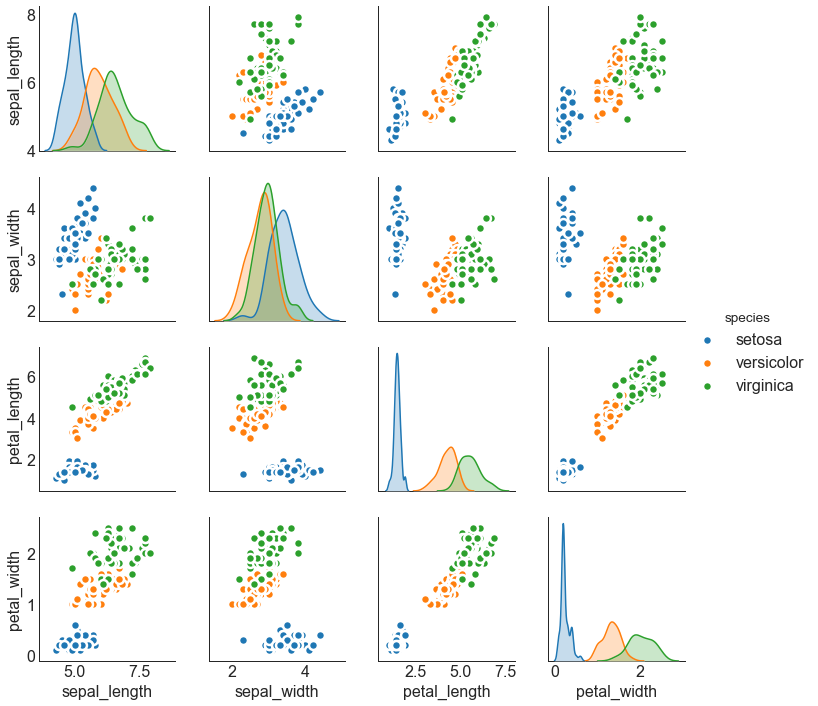

In [4]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

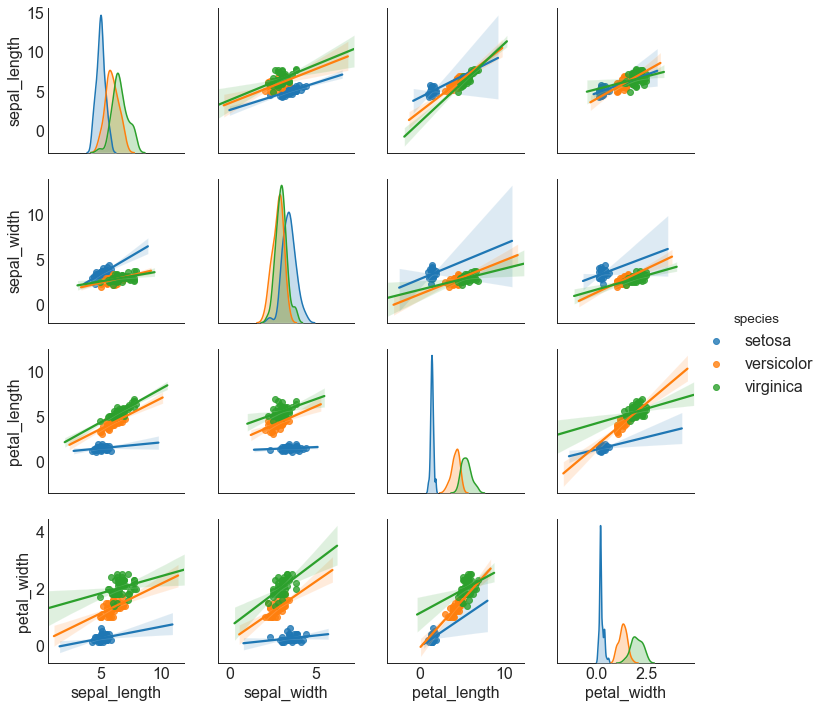

In [5]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

### 簇状图 （Cluster Plot）

簇状图 （Cluster Plot）可用于划分属于同一群集的点。 下面是根据USArrests数据集将美国各州分为5组的代表性示例。 此图使用“谋杀”和“攻击”列作为X和Y轴。 或者，您可以将第一个到主要组件用作X轴和Y轴。

d:\Users\wang\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
d:\Users\wang\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


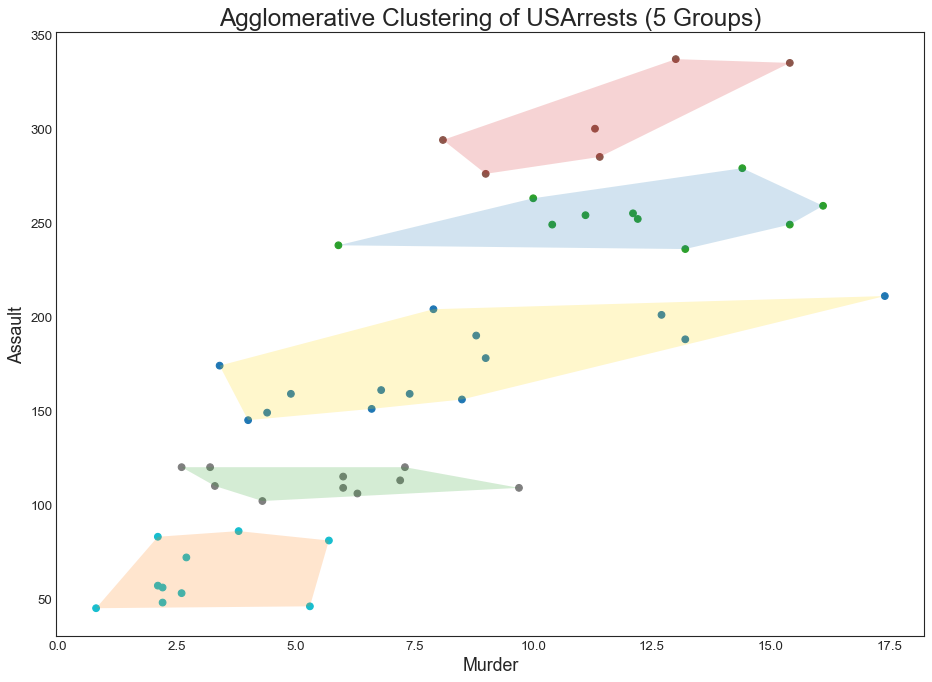

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()




### 树状图 （Dendrogram）

树形图基于给定的距离度量将相似的点组合在一起，并基于点的相似性将它们组织在树状链接中。

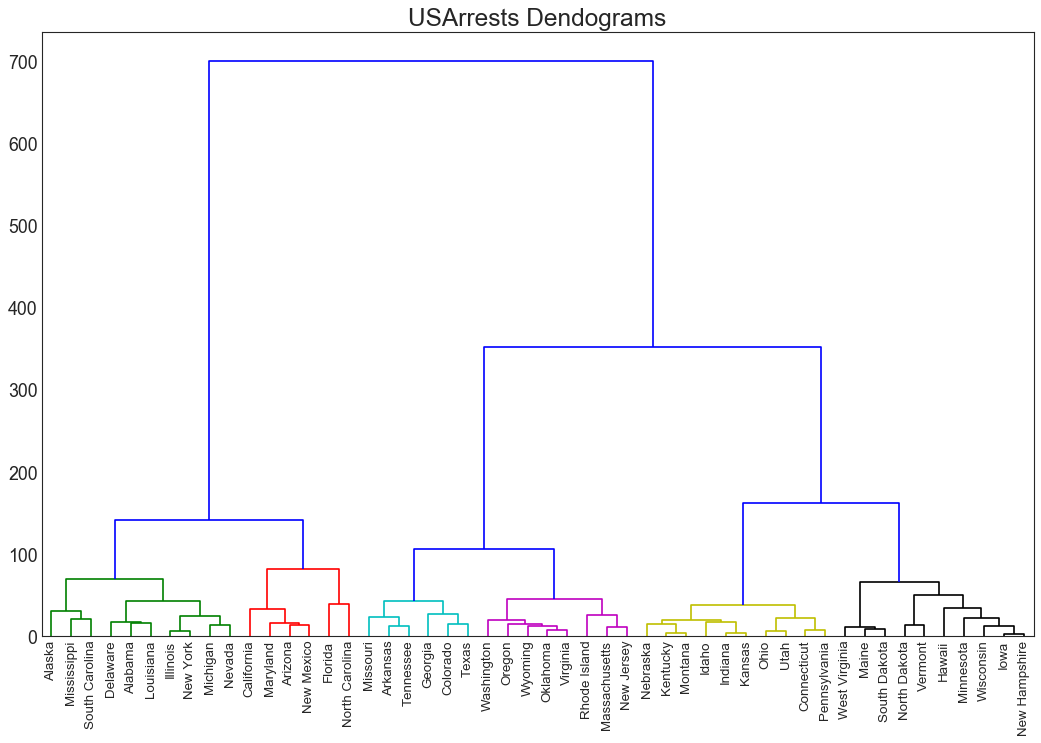

In [7]:
import scipy.cluster.hierarchy as shc

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

### 带波峰波谷标记的时序图 （Time Series with Peaks and Troughs Annotated）

下面的时间序列绘制了所有峰值和低谷，并注释了所选特殊事件的发生。

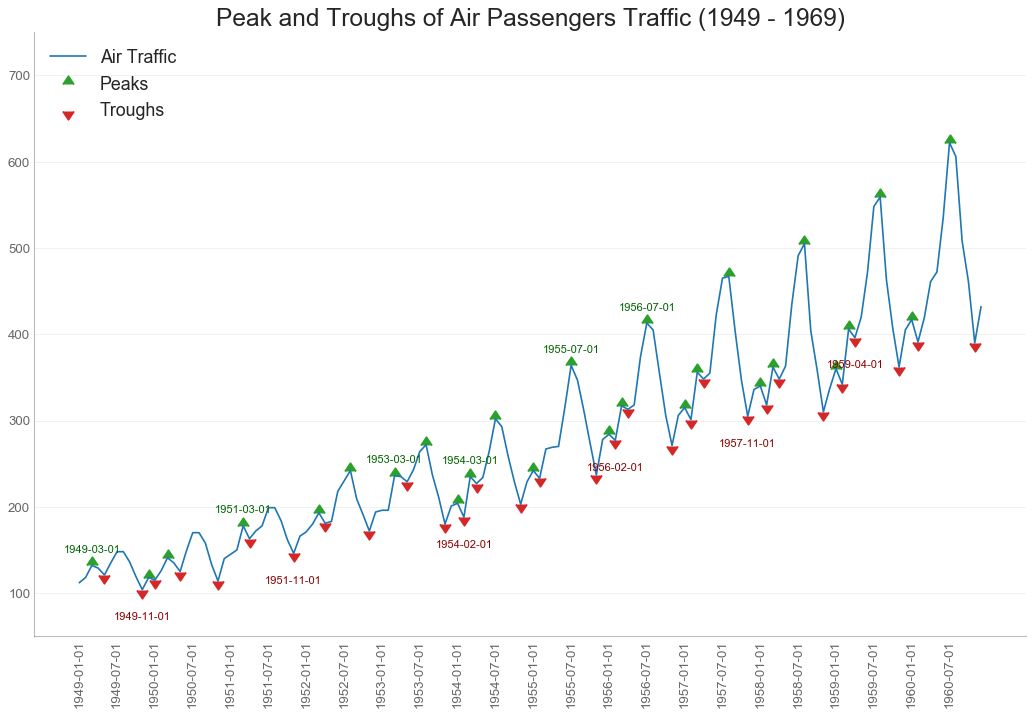

In [32]:
# Import Data
df = pd.read_csv('AirPassengers.csv')

# Get the Peaks and Troughs
data = df['traffic'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.traffic[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.traffic[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(xtick_location, xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

### 自相关和部分自相关图 （Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot）

自相关图（ACF图）显示时间序列与其自身滞后的相关性。 每条垂直线（在自相关图上）表示系列与滞后0之间的滞后之间的相关性。图中的蓝色阴影区域是显着性水平。 那些位于蓝线之上的滞后是显着的滞后。

那么如何解读呢？

对于空乘旅客，我们看到多达14个滞后跨越蓝线，因此非常重要。 这意味着，14年前的航空旅客交通量对今天的交通状况有影响。

PACF在另一方面显示了任何给定滞后（时间序列）与当前序列的自相关，但是删除了滞后的贡献。

d:\Users\wang\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


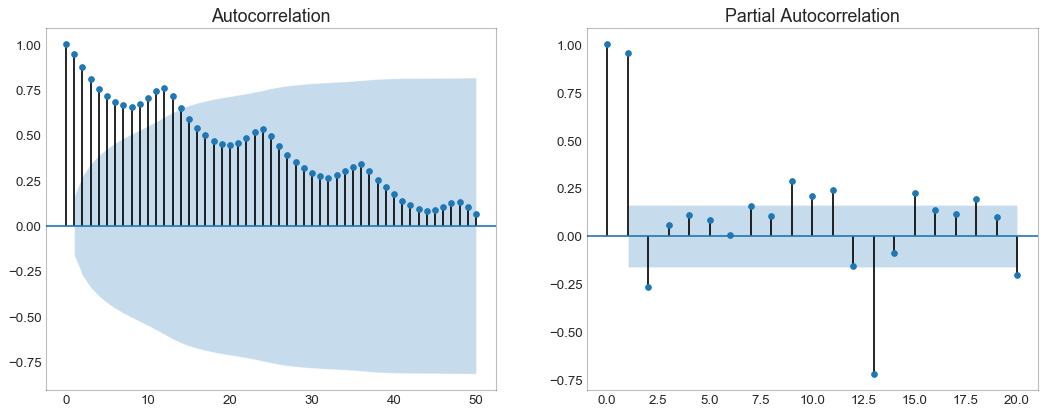

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = pd.read_csv('AirPassengers.csv')

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df.traffic.tolist(), ax=ax1, lags=50)
plot_pacf(df.traffic.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [28]:
plt.xticks?